<div style="text-align:right">Justine Charrel - Master 2 Internship</div>
This script plot the monthly serie of low, mid, high and total cloud cover for CALIPSO-GOCCP and for LMDZ6A, on southern ocean and antarctic continent.

### IMPORT

In [1]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np

### READ DATA

In [2]:
# CALIPSO-GOCCP
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_2DCloudCover_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

In [3]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [4]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+'LmdzOr6Actrl_calipso_r144x90.nc'
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [5]:
# DYNAMICO 
# path = '/home/jcharrel/Documents/stage_M2/data/DYNAMICO/'
# ncfile_dynamico_clh=path+'DYNAMICO_clh_seasonal_averaged_concatenated_2000_2014_r144x90.nc'
# nc_dynamico_clh =netCDF4.Dataset(ncfile_dynamico_clh)
# ncfile_dynamico_clh_VHR = path+'DYNAMICO_clhcalipso_VHR_seasonal_averaged_concatenated_2000_2014_r144x90.nc'
# nc_dynamico_clh_VHR =netCDF4.Dataset(ncfile_dynamico_clh_VHR)

In [6]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_austral = lat[lat <= -30]
lat_antarctica = lat[lat <= -60]

lat_id_austral = lat <= -30
lat_id_antarctica = lat <= -60

### LOAD VARIABLES

In [7]:
# GEOPOTENTIAL FOR MASK
g = 9.81 # m/s
alt_austral = nc_mask.variables['phis'][:,lat_id_austral,:]/g #m
alt_antarctica = nc_mask.variables['phis'][:,lat_id_antarctica,:]/g #m
alt_above_3000m = nc_mask.variables['phis'][:,lat_id_antarctica,:]/g #m

In [8]:
# MASK
mask_antarctica = np.where(alt_austral > 0.1, 1, np.nan) #pour masquer la partie antarctique
mask_austral = np.where(alt_antarctica <  0.1, 1, np.nan) #pour masquer la partie océan austral
mask_above_3000m_for_mid_cloud = np.where(alt_above_3000m > 3000, 1, np.nan)

In [9]:
# CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = nc_obs.variables['cllcalipso'][:,lat_id_austral,:]
clmobs_austral = nc_obs.variables['clmcalipso'][:,lat_id_austral,:]
clhobs_austral = nc_obs.variables['clhcalipso'][:,lat_id_austral,:]
cltobs_austral = nc_obs.variables['cltcalipso'][:,lat_id_austral,:]
# ANTARCTICA
cllobs_antarctica = nc_obs.variables['cllcalipso'][:,lat_id_antarctica,:]
clmobs_antarctica = nc_obs.variables['clmcalipso'][:,lat_id_antarctica,:]
clhobs_antarctica = nc_obs.variables['clhcalipso'][:,lat_id_antarctica,:]
cltobs_antarctica = nc_obs.variables['cltcalipso'][:,lat_id_antarctica,:]

# LMDZ6A
# AUSTRAL
clllmdz6a_austral = nc_lmdz6a.variables['cllcalipso'][:,lat_id_austral,:]
clmlmdz6a_austral = nc_lmdz6a.variables['clmcalipso'][:,lat_id_austral,:]
clhlmdz6a_austral = nc_lmdz6a.variables['clhcalipso'][:,lat_id_austral,:]
cltlmdz6a_austral = nc_lmdz6a.variables['cltcalipso'][:,lat_id_austral,:]
# ANTARCTICA
clllmdz6a_antarctica = nc_lmdz6a.variables['cllcalipso'][:,lat_id_antarctica,:]
clmlmdz6a_antarctica = nc_lmdz6a.variables['clmcalipso'][:,lat_id_antarctica,:]
clhlmdz6a_antarctica = nc_lmdz6a.variables['clhcalipso'][:,lat_id_antarctica,:]
cltlmdz6a_antarctica = nc_lmdz6a.variables['cltcalipso'][:,lat_id_antarctica,:]

# VARIABLE - DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = nc_dynamico_clh.variables['clhcalipso'][:,lat_id_antarctica,:]
# clhdynamicoVHR_antarctica = nc_dynamico_clh_VHR.variables['clhcalipso'][:,lat_id_antarctica,:]

In [10]:
# MASK CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = np.ma.masked_where(mask_antarctica >=0, cllobs_austral)
clmobs_austral = np.ma.masked_where(mask_antarctica >=0, clmobs_austral)
clhobs_austral = np.ma.masked_where(mask_antarctica >=0, clhobs_austral)
cltobs_austral = np.ma.masked_where(mask_antarctica >=0, cltobs_austral)
# ANTARCTICA
cllobs_antarctica = np.ma.masked_where(mask_austral >=0, cllobs_antarctica)
clmobs_antarctica = np.ma.masked_where(mask_austral >=0, clmobs_antarctica)
clhobs_antarctica = np.ma.masked_where(mask_austral >=0, clhobs_antarctica)
cltobs_antarctica = np.ma.masked_where(mask_austral >=0, cltobs_antarctica)

# MASK LMDZ6A
# AUSTRAL
clllmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clllmdz6a_austral)
clmlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clmlmdz6a_austral)
clhlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clhlmdz6a_austral)
cltlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, cltlmdz6a_austral)
# ANTARCTICA
clllmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clllmdz6a_antarctica)
clmlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clmlmdz6a_antarctica)
clhlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, clhlmdz6a_antarctica)
cltlmdz6a_antarctica = np.ma.masked_where(mask_austral >=0, cltlmdz6a_antarctica)

# MASK DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = np.ma.masked_where(mask_austral>=0, clhdynamico_antarctica)
# clhdynamicoVHR_antarctica = np.ma.masked_where(mask_austral>=0, clhdynamicoVHR_antarctica)

In [11]:
# MASK ALTITUDE ABOVE 3000M FOR MID CLOUDS BECAUSE MAYBE MODEL SEES MIST ON PLATEAU

# MASK OBS
#clmobs_antarctica = np.ma.masked_where(mask_above_3000m_for_mid_cloud >=0, clmobs_antarctica)
# MASK LMDZ6A
#clmlmdz6a_antarctica = np.ma.masked_where(mask_above_3000m_for_mid_cloud >=0, clmlmdz6a_antarctica)

In [12]:
# MASK LMDZ6A
# ANTARCTICA
mask_lat_obs_antarctica_cll = np.where(cllobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clm = np.where(clmobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clh = np.where(clhobs_antarctica.mask == True, 1, np.nan)
mask_lat_obs_antarctica_clt = np.where(cltobs_antarctica.mask == True, 1, np.nan)
clllmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_cll >=0, clllmdz6a_antarctica)
clmlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clm >=0, clmlmdz6a_antarctica)
clhlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clh >=0, clhlmdz6a_antarctica)
cltlmdz6a_antarctica = np.ma.masked_where(mask_lat_obs_antarctica_clt >=0, cltlmdz6a_antarctica)

In [13]:
# AREA MEAN - CALIPSO-GOCCP
# AUSTRAL
cllobs_austral = np.mean(cllobs_austral, axis=(1,2))
clmobs_austral = np.mean(clmobs_austral, axis=(1,2))
clhobs_austral = np.mean(clhobs_austral, axis=(1,2))
cltobs_austral = np.mean(cltobs_austral, axis=(1,2))
obs_austral = np.dstack((cllobs_austral,clmobs_austral,clhobs_austral,cltobs_austral))
# ANTARCTICA
cllobs_antarctica = np.mean(cllobs_antarctica, axis=(1,2))
clmobs_antarctica = np.mean(clmobs_antarctica, axis=(1,2))
clhobs_antarctica = np.mean(clhobs_antarctica, axis=(1,2))
cltobs_antarctica = np.mean(cltobs_antarctica, axis=(1,2))
obs_antarctica = np.dstack((cllobs_antarctica,clmobs_antarctica,clhobs_antarctica,cltobs_antarctica))

# AREA MEAN - LMDZ6A
# AUSTRAL
clllmdz6a_austral = np.mean(clllmdz6a_austral, axis=(1,2))
clmlmdz6a_austral = np.mean(clmlmdz6a_austral, axis=(1,2))
clhlmdz6a_austral = np.mean(clhlmdz6a_austral, axis=(1,2))
cltlmdz6a_austral = np.mean(cltlmdz6a_austral, axis=(1,2))
lmdz6a_austral = np.ma.dstack((clllmdz6a_austral,clmlmdz6a_austral,clhlmdz6a_austral,cltlmdz6a_austral))
# ANTARCTICA
clllmdz6a_antarctica = np.mean(clllmdz6a_antarctica, axis=(1,2))
clmlmdz6a_antarctica = np.mean(clmlmdz6a_antarctica, axis=(1,2))
clhlmdz6a_antarctica = np.mean(clhlmdz6a_antarctica, axis=(1,2))
cltlmdz6a_antarctica = np.mean(cltlmdz6a_antarctica, axis=(1,2))
lmdz6a_antarctica = np.ma.dstack((clllmdz6a_antarctica,clmlmdz6a_antarctica,clhlmdz6a_antarctica,cltlmdz6a_antarctica))

# AREA MEAN - DYNAMICO
# ANTARCTICA
# clhdynamico_antarctica = np.mean(clhdynamico_antarctica, axis=(1,2))
# clhdynamicoVHR_antarctica = np.mean(clhdynamicoVHR_antarctica, axis=(1,2))

### FUNCTION PLOT

In [25]:
def plot(months,titles,labels,legends,language) :
    fig, axes = plt.subplots(figsize=(16,9), nrows=2, ncols=2)
    pltcounter = 0
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for idx, plotid in enumerate(axes.flat):
        pltcounter = pltcounter + 1
        if pltcounter == 1:
            plotid.set_title(titles[0], size=16)
            plotid.set_ylabel(labels[0], size=16)
            plotid.set_ylim(0,40)
        elif pltcounter == 2:
            plotid.set_title(titles[1], size=16)
            plotid.set_ylim(0,40)
        elif pltcounter == 3:
            plotid.set_title(titles[2], size=16)
            plotid.set_ylabel(labels[0], size=16)
            plotid.set_xlabel(labels[1], size=16)
            plotid.set_ylim(0,40)
            #plotid.plot(months, clhdynamico_antarctica/100, c='r', linestyle=':')
            #plotid.plot(months, clhdynamicoVHR_antarctica/100, c='g', linestyle=':')
        elif pltcounter == 4:
            plotid.set_title(titles[3], size=16)
            plotid.set_xlabel(labels[1], size=16)
            plotid.set_ylim(0,100)
    
        #CALIPSO-GOCCP
        clobs_austral_plot = obs_austral[0,:,pltcounter-1]*100
        clobs_antarctica_plot = obs_antarctica[0,:,pltcounter-1]*100
        #LMDZ6A
        cllmdz6a_austral_plot = lmdz6a_austral[0,:,pltcounter-1]*100
        cllmdz6a_antarctica_plot = lmdz6a_antarctica[0,:,pltcounter-1]*100
        
        #plotid.plot(months,clobs_austral_plot, c='b', label=legends[0])
        #plotid.plot(months,cllmdz6a_austral_plot, c='b', linestyle='--', label=legends[1])
        plotid.plot(months,clobs_antarctica_plot, c='k', label=legends[2])
        plotid.plot(months,cllmdz6a_antarctica_plot, c='k', linestyle='--', label=legends[3])
        plotid.set_xticks(months, months, rotation='vertical')
        plotid.set_xlim(months[0], months[-1])
        plotid.tick_params(axis='both', labelsize=14)
        #plotid.annotate(f'({alphabet[idx]})', xy=(0.3, 1.075), xycoords='axes fraction', color='darkgrey', fontsize=15, weight='bold', ha='left', va='top')
    
    season_boundaries = [2.6, 5.7, 8.8]
    def add_season_lines(ax):
        for boundary in season_boundaries:
            ax.axvline(x=boundary, color='gray', linestyle=':')
    for plotid in axes.flat:
        add_season_lines(plotid)
        
    handles, labels = plotid.get_legend_handles_labels()
    fig.legend(handles, labels, loc=(0.65,0.65), fontsize=14)
    fig.tight_layout()
    path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover/monthly_serie/'
    plt.savefig(path_fig+'2DCloudCover_monthly_serie_'+language+'.png',dpi=300)

### PLOT MONTHLY SERIE (FR)

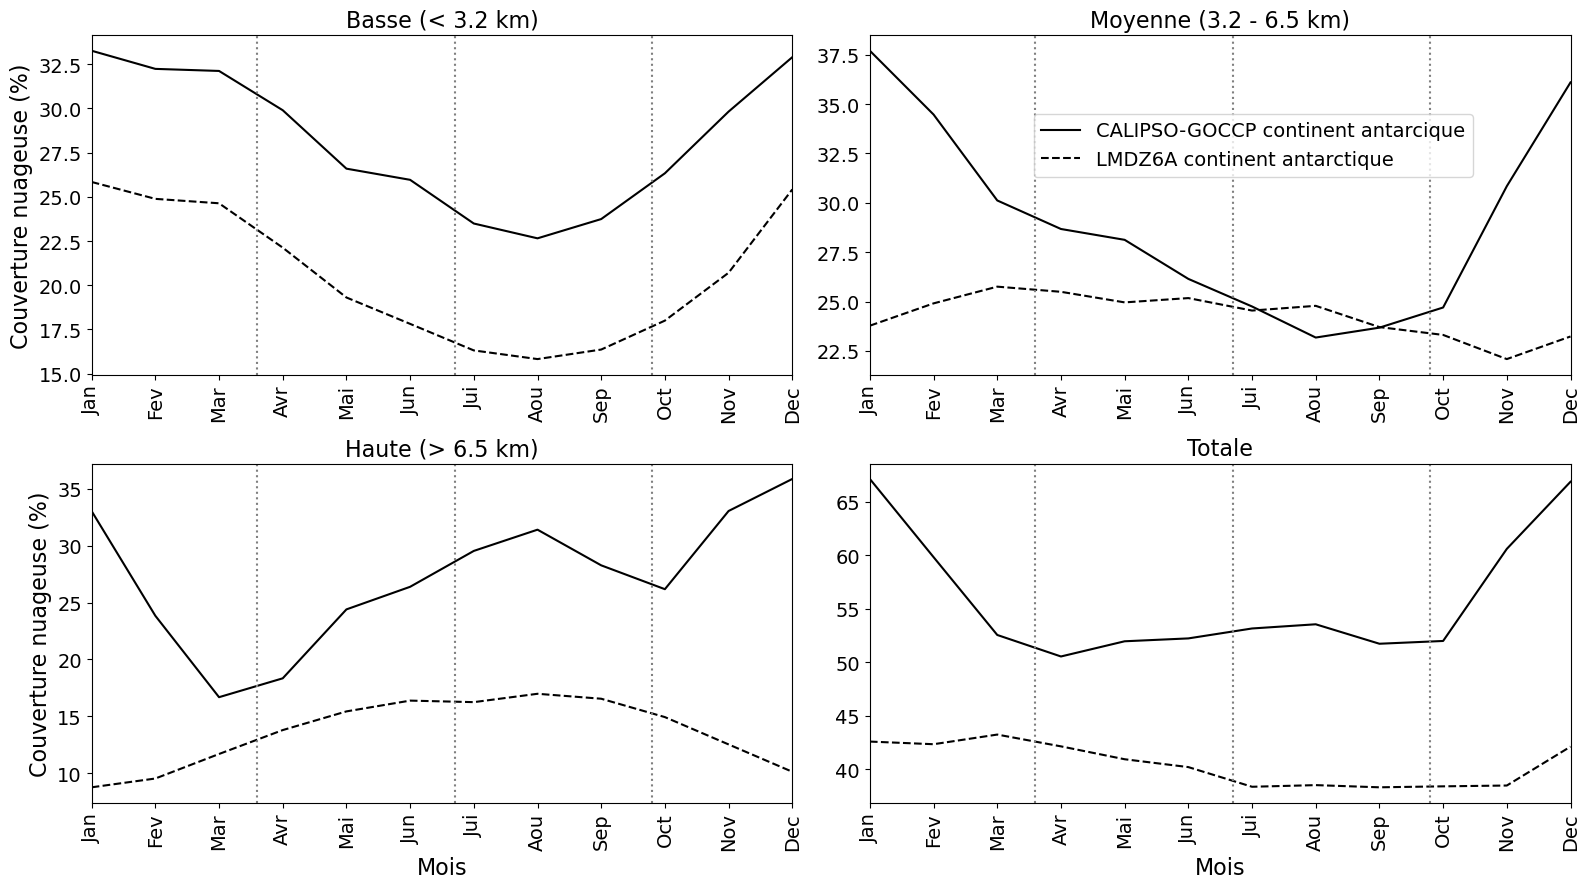

In [15]:
months = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jui', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']
titles = ["Basse (< 3.2 km)","Moyenne (3.2 - 6.5 km)","Haute (> 6.5 km)","Totale"]
labels = ['Couverture nuageuse (%)','Mois']
legends = ['CALIPSO-GOCCP océan austral','LMDZ6A océan austral','CALIPSO-GOCCP continent antarcique','LMDZ6A continent antarctique']
language = 'FR'
plot(months,titles,labels,legends,language)

### PLOT MONTHLY SERIE (EN)

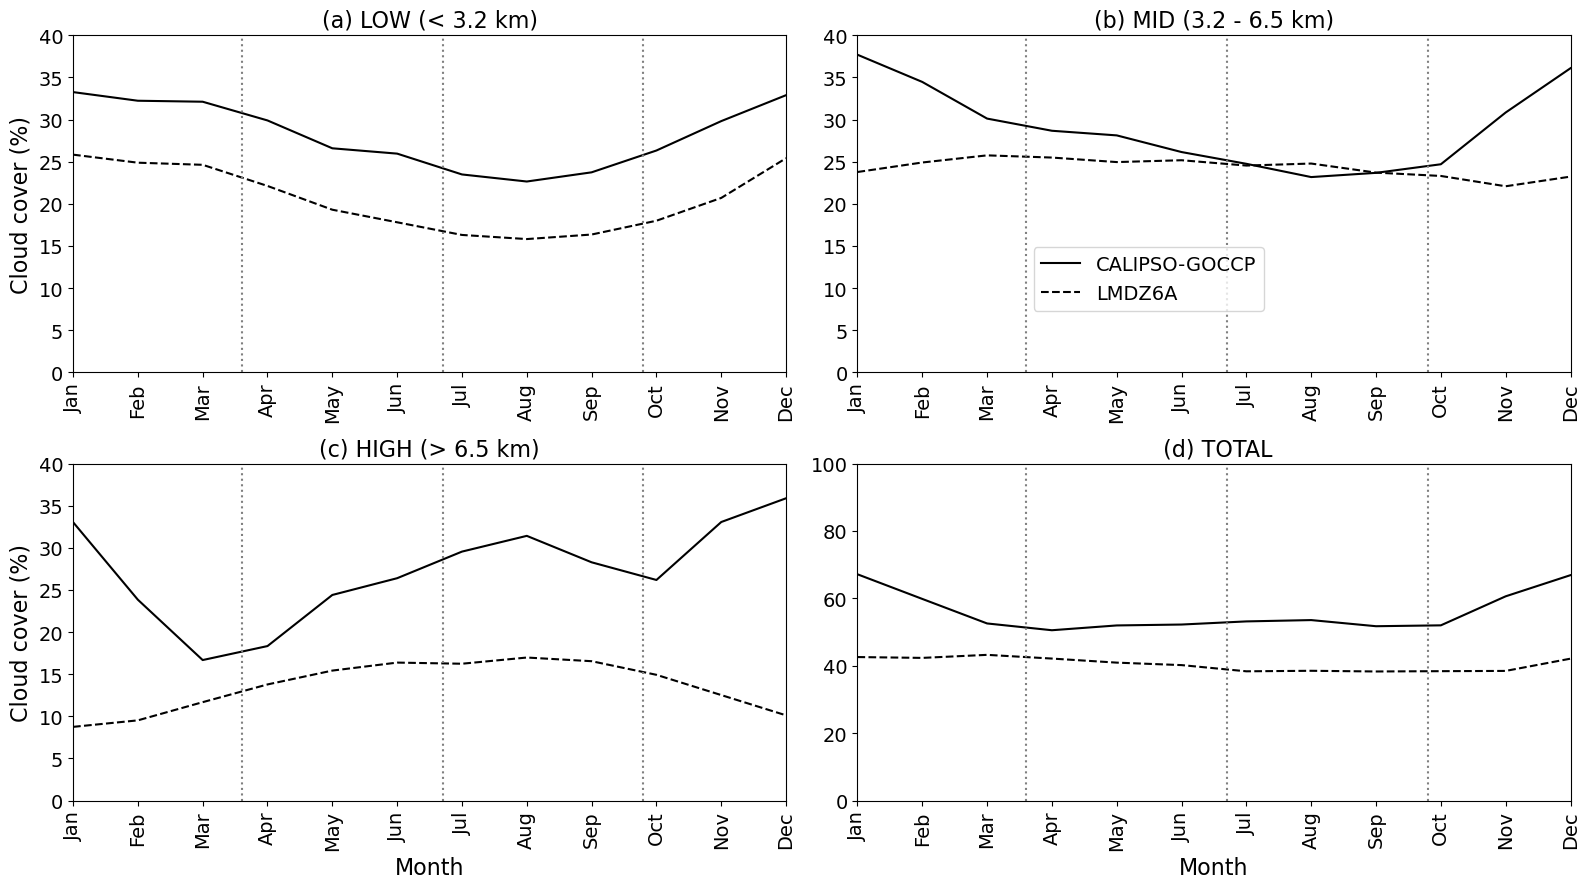

In [26]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
titles = ["(a) LOW (< 3.2 km)","(b) MID (3.2 - 6.5 km)","(c) HIGH (> 6.5 km)"," (d) TOTAL"]
labels = ['Cloud cover (%)','Month']
legends = ['CALIPSO-GOCCP southern ocean','LMDZ6A southern ocean','CALIPSO-GOCCP','LMDZ6A']
language = 'EN'
plot(months,titles,labels,legends,language)